最速下降法 例3.1

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-110, 110, 1000)
x2 = np.linspace(-110, 110, 1000)
X1, X2 = np.meshgrid(x1, x2)

G1 = np.array([[21, 4], [4, 15]])
G2 = np.array([[21, 4], [4, 1]])
b = np.array([2, 3])
c = 10


def quadFun(G, b, c, x1, x2):
    return 0.5*(G[0, 0]*x1**2 + 2*G[0, 1]*x1*x2+G[1, 1]*x2**2)+b[0]*x1+b[1]*x2+c


# 用最速下降法求二次函数极小点
iter = 0
x0 = np.array([-30, 100])
eps = 0.00001


def descent(G, b, x):
    return np.dot(G, x)+b

In [30]:
x = x0
path1 = []

while iter < 100:
    g = descent(G1, b, x)
    print(iter, x, np.linalg.norm(g))
    # ax1.plot(x[0], x[1], 'o-')
    path1.append(x)
    if np.linalg.norm(g) < eps:
        break
    d = -g
    a = np.dot(-g.T, d) / np.dot(np.dot(d.T, G1), d)
    x = x + a*d
    iter += 1

0 [-30 100] 1401.6679349974445
1 [-13.56730783   0.3227488 ] 285.4238502087325
2 [-0.83873483  2.42116865] 36.44801868335119
3 [-0.41143029 -0.17077073] 7.42196747555679
4 [-0.08044514 -0.11620485] 0.9477694629179956
5 [-0.0693338  -0.18360387] 0.19299578913233126
6 [-0.06072709 -0.18218498] 0.024645151843334673
7 [-0.06043816 -0.18393758] 0.005018531103172105
8 [-0.06021436 -0.18390068] 0.0006408557493623731
9 [-0.06020684 -0.18394626] 0.0001304984660379132
10 [-0.06020102 -0.1839453 ] 1.66643765920942e-05
11 [-0.06020083 -0.18394648] 3.393393263253158e-06


In [31]:
x = x0
path2 = []
iter = 0

while iter < 100:
    g = descent(G2, b, x)
    print(iter, x, np.linalg.norm(g))
    # ax2.scatter(x[0], x[1], 'o-')
    path2.append(x)
    if np.linalg.norm(g) < eps:
        break
    d = -g
    a = np.dot(-g.T, d) / np.dot(np.dot(d.T, G2), d)
    x = x + a*d
    iter += 1


0 [-30 100] 228.63289352147035
1 [-19.38676944 100.79133737] 26.317109691774924
2 [-15.60461866  50.06602097] 125.7810907287419
3 [-9.76581001 50.50137074] 14.478208760230551
4 [-7.68508119 22.59512538] 69.1977542742616
5 [-4.4728937  22.83463059] 7.9651045027306475
6 [-3.32819253  7.48216785] 38.06875237651937
7 [-1.56102579  7.61393028] 4.381957104644578
8 [-0.93127493 -0.83214009] 20.943308387737474
9 [ 0.04092184 -0.75965174] 2.4107088689623914
10 [ 0.38737571 -5.40620949] 11.521842425663888
11 [ 0.92222425 -5.36633044] 1.326237822988746
12 [ 1.11282389 -7.92260785] 6.338676317231525
13 [ 1.40706778 -7.90066861] 0.7296222226464671
14 [ 1.51192509 -9.30699015] 3.4871868552147443
15 [ 1.6738017 -9.2949204] 0.40139753108526594
16 [  1.73148835 -10.06860022] 1.9184560868213023
17 [  1.82054385 -10.06196012] 0.22082657704274541
18 [  1.85227984 -10.48759569] 1.0554277444461388
19 [  1.90127322 -10.48394268] 0.12148648995565324
20 [  1.91873259 -10.71810367] 0.5806375925926561
21 [  1.94

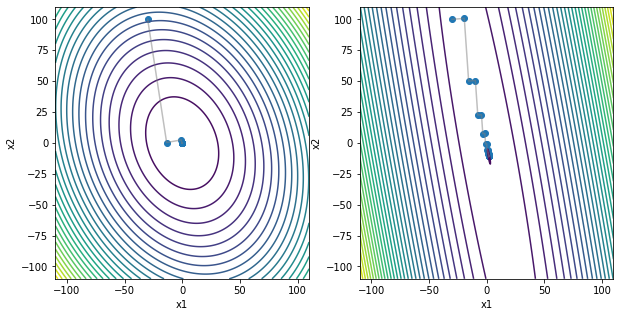

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.contour(X1, X2, quadFun(G1, b, c, X1, X2), levels=30)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax2.contour(X1, X2, quadFun(G2, b, c, X1, X2), levels=30)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')


ax1.scatter(*zip(*path1), marker='o')
ax1.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)

ax2.scatter(*zip(*path2), marker='o')
ax2.plot(*zip(*path2), linestyle='-', color='gray', alpha=0.5)

plt.show()